# Tested on Coarse Grained .dump N = 60000

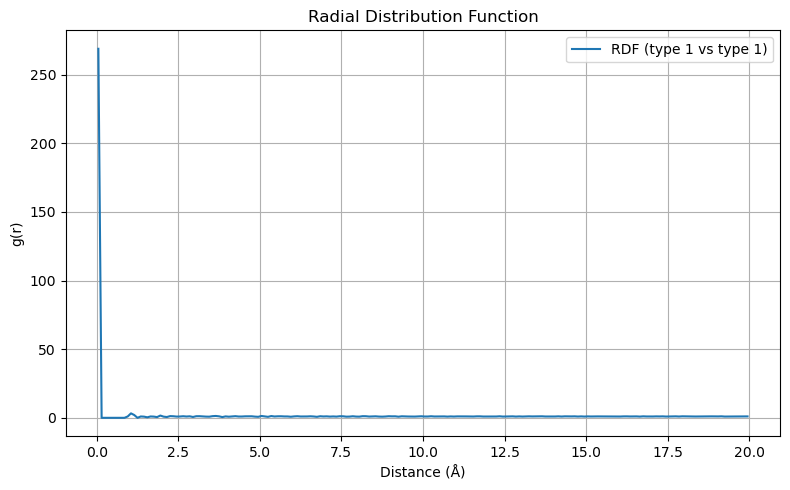

In [5]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt
u = mda.Universe("production_4ns.dump", format="LAMMPSDUMP")
u.trajectory[0] # Frame 1 is taken here!

# print(u.atoms.types)

group1 = u.select_atoms("type 1 and index 1")
group2 = u.select_atoms("type 1")

# Initialize the RDF calculation (defaults: bins=75, range=(0, 15))
rdf = InterRDF(group1, group2, nbins=200, range=(0.0, 20.0))
rdf.run()

# Plot RDF
plt.figure(figsize=(8, 5))
plt.plot(rdf.bins, rdf.rdf, label='RDF (type 1 vs type 1)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# So, it seems like the function has included the index 1 atom itself in group 2 that is why an unexpected peak is rendered at Distance = 0

# Let's exclude atom indexed 1 from group 2

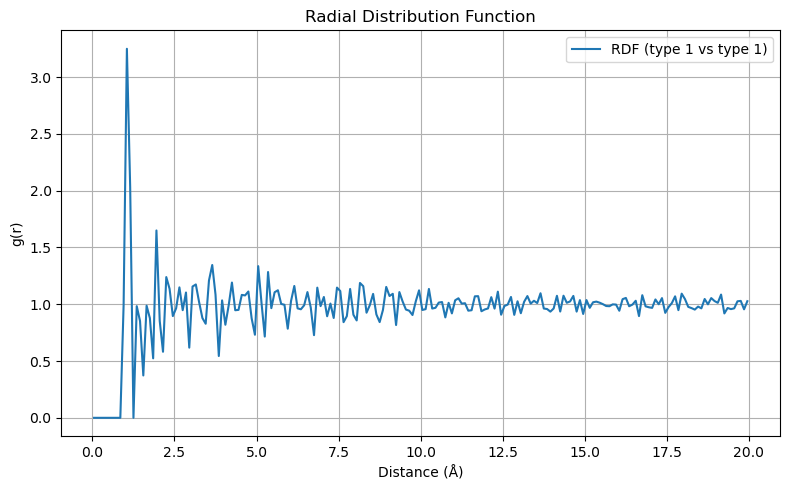

In [6]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt
u = mda.Universe("production_4ns.dump", format="LAMMPSDUMP")
u.trajectory[0] # Frame 1 is taken here!

# print(u.atoms.types)

group1 = u.select_atoms("type 1 and index 1")
group2 = u.select_atoms("type 1 and not index 1")

# Initialize the RDF calculation (defaults: bins=75, range=(0, 15))
rdf = InterRDF(group1, group2, nbins=200, range=(0.0, 20.0))
rdf.run()

# Plot RDF
plt.figure(figsize=(8, 5))
plt.plot(rdf.bins, rdf.rdf, label='RDF (type 1 vs type 1)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
